In [1]:
using Plots
using LinearAlgebra

In [2]:
data_points =[(3.0, 2.5), (4.5, 1.0), (7.0, 2.5), (9.0, 0.5)]
k = length(data_points)

4

In [3]:
# number of equations 
n = k-1 
# number of unknows variables 
number_of_unknows_variables = 4*n

12

In [4]:
x_points = [x for (x, y) in data_points]
y_points = [y for (x, y) in data_points]

4-element Vector{Float64}:
 2.5
 1.0
 2.5
 0.5

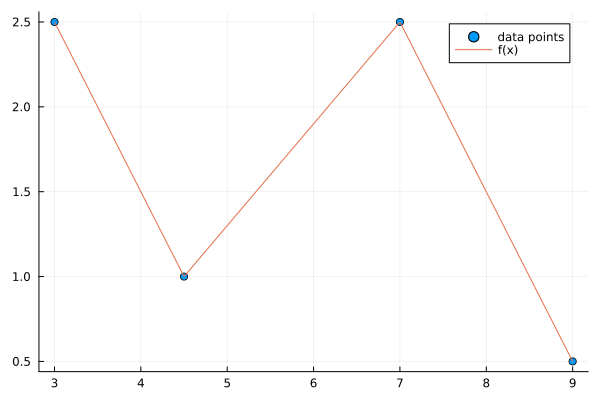

In [5]:
scatter!(x_points, y_points, label="data points")
plot!(x_points,y_points, label="f(x)")

In [6]:
# A matrix
A = zeros(number_of_unknows_variables, number_of_unknows_variables)
# b vector
b = zeros(number_of_unknows_variables)

12-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [7]:
# fill A and b
for i in 1:n
    x_i = x_points[i]
    y_i = y_points[i]
    x_i_plus_1 = x_points[i+1]
    y_i_plus_1 = y_points[i+1]
    
    # fill b
    b[2*i-1] = y_i
    b[2*i] = y_i_plus_1
    # fill A
    A[2*i-1, 4*i-3:4*i] = [x_i^3, x_i^2, x_i, 1]

    A[2*i, 4*i-3:4*i] = [x_i_plus_1^3, x_i_plus_1^2, x_i_plus_1, 1]

end

In [8]:
# fill the first derivative

for i in 1:n-1
    x_i = x_points[i+1]
    x_i_plus_1 = x_points[i+2]
    A[2*n+i, 4*i-3:4*i] = [3*x_i^2, 2*x_i, 1, 0]
    A[2*n+i, 4*i+1:4*i+4] =  [-3*x_i^2, -2*x_i, -1, 0]

end

In [9]:
A

12×12 Matrix{Float64}:
 27.0     9.0   3.0  1.0    0.0     0.0    0.0  0.0     0.0    0.0   0.0  0.0
 91.125  20.25  4.5  1.0    0.0     0.0    0.0  0.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0   91.125  20.25   4.5  1.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0  343.0    49.0    7.0  1.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0    0.0     0.0    0.0  0.0   343.0   49.0   7.0  1.0
  0.0     0.0   0.0  0.0    0.0     0.0    0.0  0.0   729.0   81.0   9.0  1.0
 60.75    9.0   1.0  0.0  -60.75   -9.0   -1.0  0.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0  147.0    14.0    1.0  0.0  -147.0  -14.0  -1.0  0.0
  0.0     0.0   0.0  0.0    0.0     0.0    0.0  0.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0    0.0     0.0    0.0  0.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0    0.0     0.0    0.0  0.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0    0.0     0.0    0.0  0.0     0.0    0.0   0.0  0.0

In [10]:
# fill the second derivative
for i in 1:n-1
    x_i = x_points[i+1]
    A[3*n+i-1, 4*i-3:4*i] = [6*x_i, 2, 0, 0]
    A[3*n+i-1, 4*i+1:4*i+4] =  [-6*x_i, -2, 0, 0]
end

In [11]:
# assumption of a natural cubic spline 
A[4*n-1, 1:4] = [6*x_points[1], 2, 0, 0]
A[4*n, 4*n-3:4*n] = [6*x_points[n+1], 2, 0, 0]

4-element Vector{Float64}:
 54.0
  2.0
  0.0
  0.0

In [12]:
A

12×12 Matrix{Float64}:
 27.0     9.0   3.0  1.0    0.0     0.0    0.0  0.0     0.0    0.0   0.0  0.0
 91.125  20.25  4.5  1.0    0.0     0.0    0.0  0.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0   91.125  20.25   4.5  1.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0  343.0    49.0    7.0  1.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0    0.0     0.0    0.0  0.0   343.0   49.0   7.0  1.0
  0.0     0.0   0.0  0.0    0.0     0.0    0.0  0.0   729.0   81.0   9.0  1.0
 60.75    9.0   1.0  0.0  -60.75   -9.0   -1.0  0.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0  147.0    14.0    1.0  0.0  -147.0  -14.0  -1.0  0.0
 27.0     2.0   0.0  0.0  -27.0    -2.0    0.0  0.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0   42.0     2.0    0.0  0.0   -42.0   -2.0   0.0  0.0
 18.0     2.0   0.0  0.0    0.0     0.0    0.0  0.0     0.0    0.0   0.0  0.0
  0.0     0.0   0.0  0.0    0.0     0.0    0.0  0.0    54.0    2.0   0.0  0.0

In [13]:
x = A\b

12-element Vector{Float64}:
   0.18656527249683175
  -1.6790874524714856
   3.6174904942965895
   1.7220532319391388
  -0.2141444866920155
   3.730494296577952
 -20.725627376425884
  38.236730038022856
   0.1277566539923964
  -3.4494296577947017
  29.53384030418271
 -79.03536121673056

In [14]:
# get the coefficients of the cubic spline
cublic_spline_coefficients = [(x[4*i-3], x[4*i-2], x[4*i-1], x[4*i]) for i in 1:n]

3-element Vector{NTuple{4, Float64}}:
 (0.18656527249683175, -1.6790874524714856, 3.6174904942965895, 1.7220532319391388)
 (-0.2141444866920155, 3.730494296577952, -20.725627376425884, 38.236730038022856)
 (0.1277566539923964, -3.4494296577947017, 29.53384030418271, -79.03536121673056)

In [15]:
cublic_polyomial(x)=(a,b,c,d)->a*x^3+b*x^2+c*x+d

cublic_polyomial (generic function with 1 method)

In [16]:
# get the intervals of the cubic spline
intervals = [(x_points[i], x_points[i+1]) for i in 1:n]

3-element Vector{Tuple{Float64, Float64}}:
 (3.0, 4.5)
 (4.5, 7.0)
 (7.0, 9.0)

In [17]:
function get_index(x)
    for i in 1:n
        if x >= intervals[i][1] && x <= intervals[i][2]
            return i
        end
    end
end

get_index (generic function with 1 method)

In [18]:
function cubic_spline(x)
    i = get_index(x)
    a, b, c, d = cublic_spline_coefficients[i]
    return cublic_polyomial(x)(a, b, c, d)
end

cubic_spline (generic function with 1 method)

In [19]:
# cubic_spline(-0.2)

ArgumentError: ArgumentError: invalid index: nothing of type Nothing

In [20]:
x_first_point = x_points[1]
x_last_point = x_points[end]

x_values = range(x_first_point, x_last_point, length=100)

3.0:0.06060606060606061:9.0

In [21]:
y_values = [cubic_spline(x) for x in x_values]

100-element Vector{Float64}:
 2.4999999999999947
 2.4139947520468894
 2.3282386938725566
 2.2429810152557774
 2.158470905975326
 2.0749575558099735
 1.9926901545384972
 1.9119178919396749
 1.8328899577922773
 1.755855541875082
 ⋮
 1.2180576147675026
 1.1312866273900681
 1.0433211542251968
 0.9543318360996977
 0.8644893138404086
 0.7739642282739396
 0.6829272202273273
 0.591548930526983
 0.5

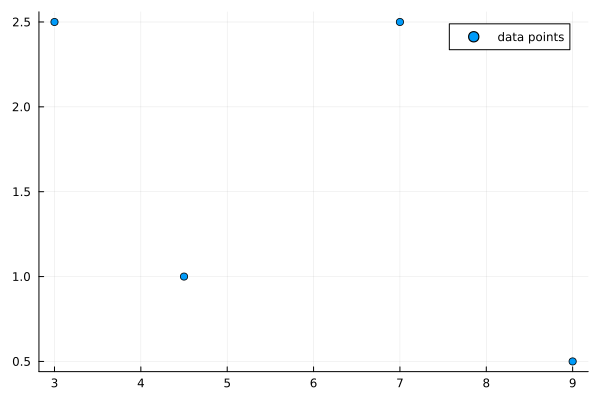

In [22]:
scatter(x_points, y_points, label="data points")

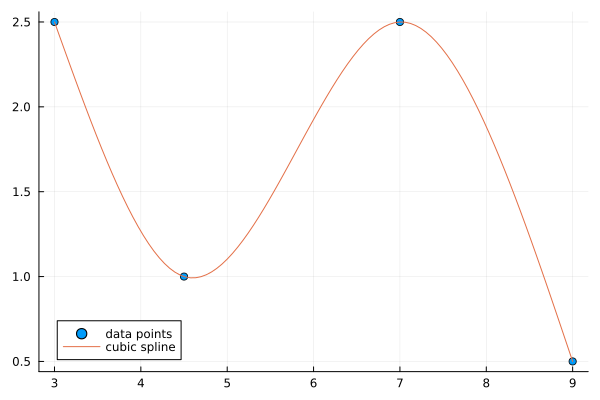

In [23]:
plot!(x_values, y_values, label="cubic spline")